# 고객 중분류 EDA
고객분류 그룹별로 선호하는 etf를 찾고 그룹들의 특성을 파악하고자 함
 

In [4]:
# 데이터 로드 및 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

# 현재 작업 디렉토리 가져오기
current_directory = os.getcwd()
print("현재 디렉토리:", current_directory)

# 3개 위의 폴더 찾기
three_levels_up = os.path.dirname(os.path.dirname(os.path.dirname(current_directory)))
print("3개 위의 디렉토리:", three_levels_up)

# 3개 위의 폴더 찾기
data_path = os.path.join(three_levels_up,'ETF_data')

# 현재 작업 디렉토리 확인
print("현재 작업 디렉토리:", os.getcwd())

# 새로운 디렉토리로 변경
os.chdir(data_path)

# 변경된 작업 디렉토리 확인
print("변경된 작업 디렉토리:", os.getcwd())

# 현재 작업 디렉토리 확인
print("현재 작업 디렉토리:", os.getcwd())

# 새로운 디렉토리로 변경
os.chdir(data_path)

# 변경된 작업 디렉토리 확인
print("변경된 작업 디렉토리:", os.getcwd())



현재 디렉토리: c:\Users\howsr\workspace\DSHY_main\ETF_data
3개 위의 디렉토리: c:\Users\howsr
현재 작업 디렉토리: c:\Users\howsr\workspace\DSHY_main\ETF_data


FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다: 'c:\\Users\\howsr\\ETF_data'

In [6]:
# etf_df.csv 파일을 불러와 etf_df 에 저장
etf_df = pd.read_csv('etf_df.csv')

# 날짜및고객분류별보유ETF.pkl 파일을 불러와 groupby_dict 에 저장
with open('날짜및고객분류별보유ETF.pkl', 'rb') as f:
    groupby_dict = pickle.load(f)
    

In [54]:
# 20240706이 키의 0번 인덱스인 고객분류별 데이터 프레임을 df_0726에 저장
dict_0726 = {key[1] : value for key, value in groupby_dict.items() if key[0] == 20240726 and key[1] not in [11, 12]}
group_names = list(dict_0726.keys())
group_names.sort()
print(group_names)

[21, 22, 23, 24, 25, 31, 32, 33, 34]


## 그룹 중분류는 고객의 나이대별로 1~5, 자산 규모를 기준으로 1~3 으로 분류
- 분류코드 1의 경우 투자 실력으로, 처음 고객이 처음 서비스에 들어 왔을 때 분류에 따른 추천을 적용했을때, 대부분의 일반투자자들에게 일반투자자들의 선택을 보여주는 대신 투자 실력가들의 선택을 보여주는게 조금 더 추천시스템의 적합하다고 생각하여, 중분류 1은 따로 분석하여 다른 추천 카테고리를 만들기로 기획 했습니다.
- 종목을 제외한 etf만 사용하기 위해 etf가 아닌 종목을 제거 하였습니다.

In [55]:
# etf ticker 리스트 생성
tickers = etf_df['티커종목코드'].tolist()
# dict_0726의 value값들중 tickers 리스트에 있는 티커만 남기고 나머지는 제거
dict_0726 = {key: value[value.index.isin(tickers)] for key, value in dict_0726.items()}

## 그룹별 분포 확인
모든 그룹에서 보유고객 계좌수를 확인 했을 때 Right shew 함을 확인 할 수 있었고, 각 그룹 별 top10 etf를 확인 했을 때 약간의 순서 차이만 있을 뿐 많은 종목이 교침을 확인 할 수 있었습니다.
그에 따라 많은 그룹에서 공통되는 etf를 분류하고 공통되지 않는 etf중 그룹의 특성을 파악 할 수 있는 etf 확인 해보았습니다.

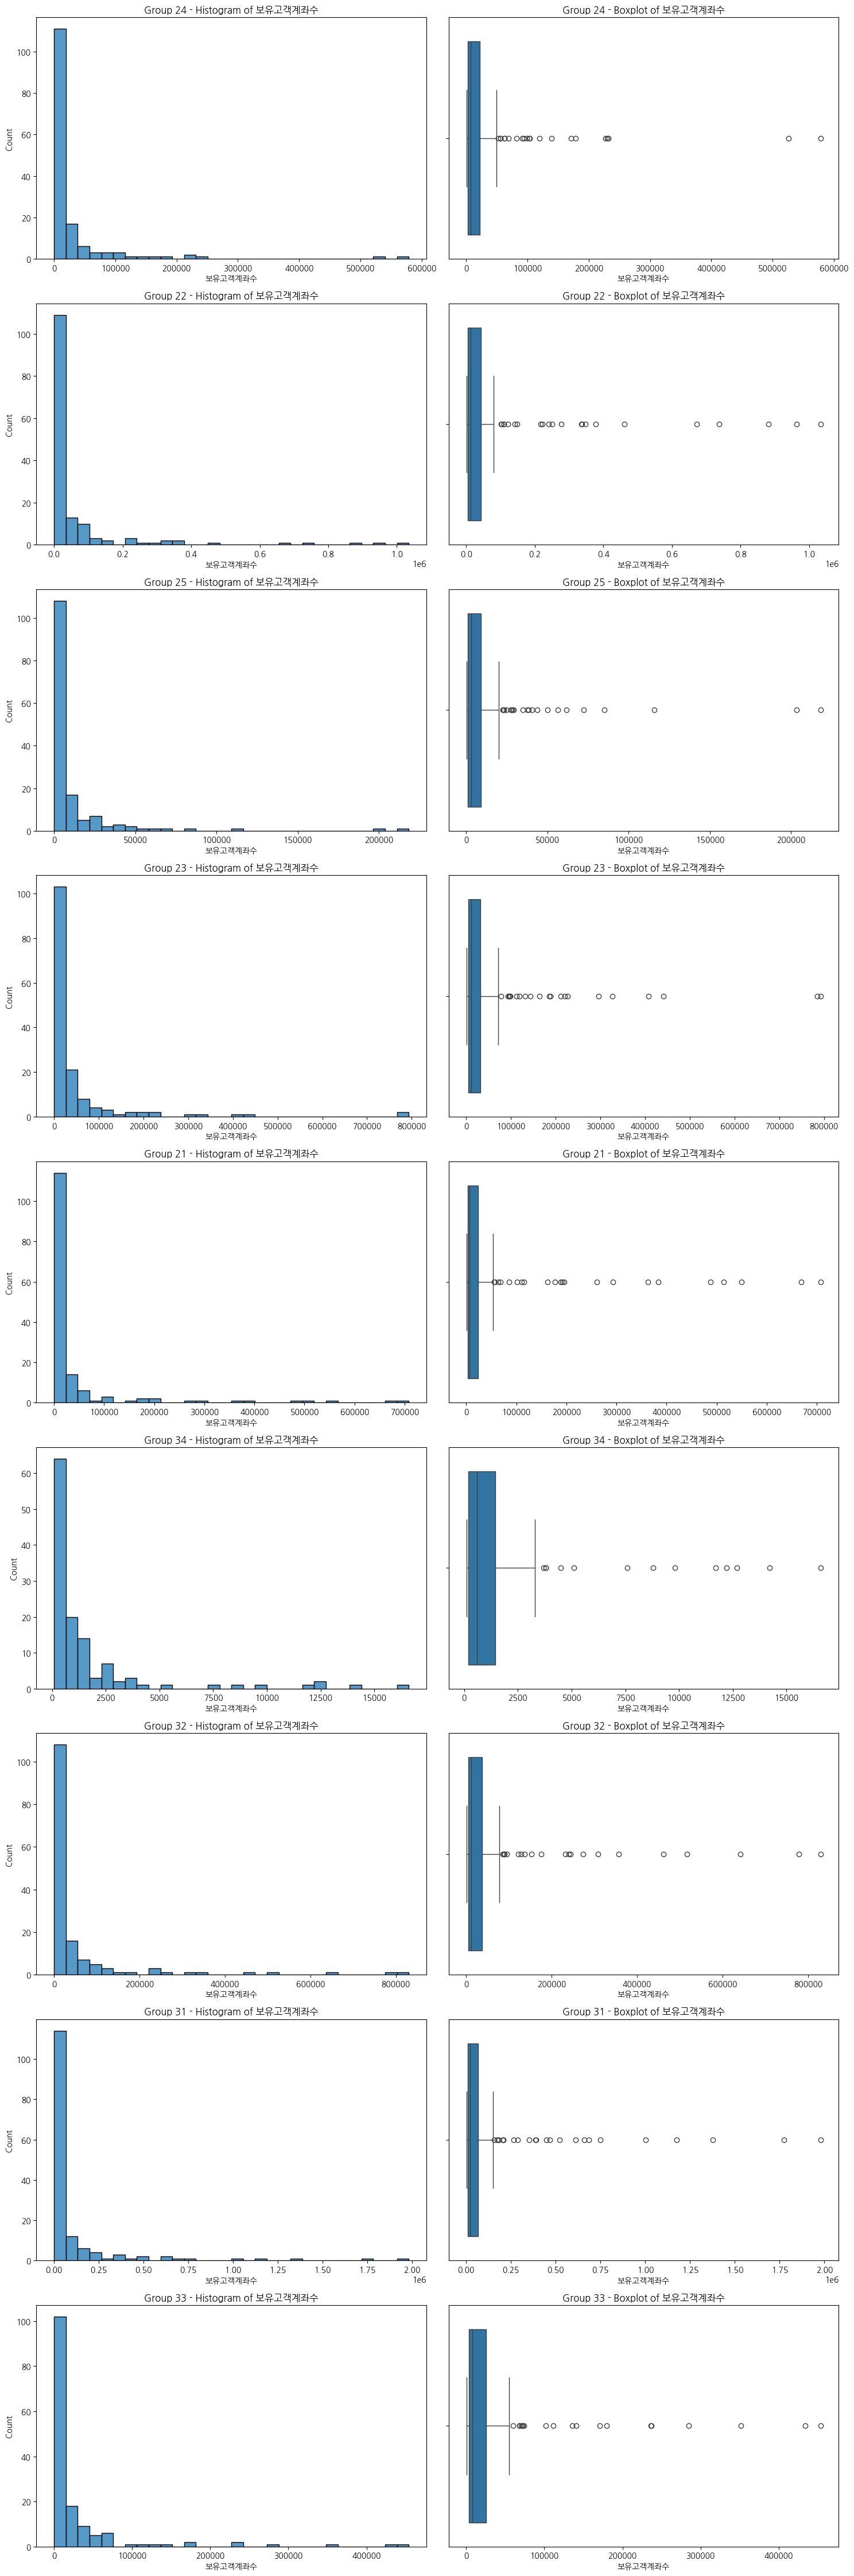

In [60]:
# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
# 히스토그램과 박스플롯을 그리기 위한 설정
fig, axes = plt.subplots(len(dict_0726), 2, figsize=(15, 5 * len(dict_0726)))

for i, (group_name, df) in enumerate(dict_0726.items()):
    # 히스토그램
    sns.histplot(df['보유고객계좌수'], bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Group {group_name} - Histogram of 보유고객계좌수')
    
    # 박스플롯
    sns.boxplot(x=df['보유고객계좌수'], ax=axes[i, 1])
    axes[i, 1].set_title(f'Group {group_name} - Boxplot of 보유고객계좌수')

plt.tight_layout()
plt.show()

In [56]:
# dict_0726의 각 value의 보유고객계좌수가 가장 높은 10개의 ETF를 찾아 출력
for group_name in group_names:
    imsi = dict_0726[group_name]
    top_10_etfs = imsi.sort_values(by='보유고객계좌수', ascending=False).head(10).index
    print(f'{group_name}:{list(top_10_etfs)}')


21:['TQQQ', 'QQQ', 'SOXL', 'SCHD', 'SPY', 'VOO', 'SPLG', 'QLD', 'TMF', 'TLT']
22:['TQQQ', 'QQQ', 'SOXL', 'SCHD', 'SPY', 'VOO', 'TMF', 'QLD', 'SPLG', 'TLT']
23:['SOXL', 'TQQQ', 'SCHD', 'QQQ', 'TMF', 'SPY', 'TSLL', 'JEPI', 'TLT', 'VOO']
24:['SOXL', 'TQQQ', 'QQQ', 'SCHD', 'TMF', 'TSLL', 'SPY', 'JEPI', 'TLT', 'QLD']
25:['SOXL', 'TQQQ', 'QQQ', 'SPY', 'TMF', 'SCHD', 'TSLL', 'TLT', 'JEPI', 'VOO']
31:['TQQQ', 'SOXL', 'QQQ', 'SCHD', 'SPY', 'SPLG', 'VOO', 'TMF', 'QLD', 'TSLL']
32:['TQQQ', 'SOXL', 'QQQ', 'SCHD', 'SPY', 'TMF', 'VOO', 'TLT', 'TSLL', 'QLD']
33:['SOXL', 'TQQQ', 'QQQ', 'SCHD', 'SPY', 'TMF', 'TLT', 'VOO', 'JEPI', 'TSLL']
34:['QQQ', 'SOXL', 'TMF', 'TQQQ', 'SPY', 'TLT', 'SCHD', 'VOO', 'SOXX', 'JEPI']


In [65]:
# dict_0726의 각 value의 '보유고객계좌수'가 Q3 보다 큰 index를 찾아 딕셔너리 형태로 저장
dict_0726_q3 = {key: value[value['보유고객계좌수'] > value['보유고객계좌수'].quantile(0.75)].index.tolist() for key, value in dict_0726.items()}

# value값들의 길이를 출력
for group_name in group_names:
    print(f'{group_name}: {len(dict_0726_q3[group_name])}')

# 리스트의 원소별로 몇개의 그룹에 속하는지 확인하여 출력
from collections import Counter
count = Counter([etf for etfs in dict_0726_q3.values() for etf in etfs])
print(len(count))
print(count)


21: 38
22: 38
23: 38
24: 38
25: 38
31: 38
32: 38
33: 38
34: 31
47
Counter({'ARKG': 9, 'ICLN': 9, 'JEPI': 9, 'JEPQ': 9, 'NVDL': 9, 'SOXL': 9, 'SOXX': 9, 'SPY': 9, 'TLT': 9, 'TQQQ': 9, 'TSLL': 9, 'UPRO': 9, 'ARKK': 9, 'LIT': 9, 'METV': 9, 'QLD': 9, 'QQQ': 9, 'QQQM': 9, 'SCHD': 9, 'TMF': 9, 'TSLY': 9, 'VOO': 9, 'YINN': 9, 'IVV': 8, 'LABU': 8, 'TLTW': 8, 'CONY': 8, 'QYLD': 8, 'SPLG': 8, 'SPYG': 8, 'VNQ': 7, 'SMH': 7, 'SSO': 7, 'NVDY': 6, 'BOTZ': 6, 'DIA': 6, 'VTI': 6, 'USD': 5, 'SPHD': 4, 'CONL': 3, 'TNA': 3, 'CWEB': 3, 'IWM': 3, 'SPYD': 2, 'VIG': 2, 'MOAT': 1, 'ARKX': 1})


In [72]:
# count안에서 7이상의 ETF만 추출하여 etf_df_q3에 저장하고 dict_0726의 value값들중 etf_df_q3에 있는 티커를 제거
etf_df_q3 = [key for key, value in count.items() if value >= 7]
dict_0726 = {key: value[~value.index.isin(etf_df_q3)] for key, value in dict_0726.items()}
print(len(etf_df_q3))

33


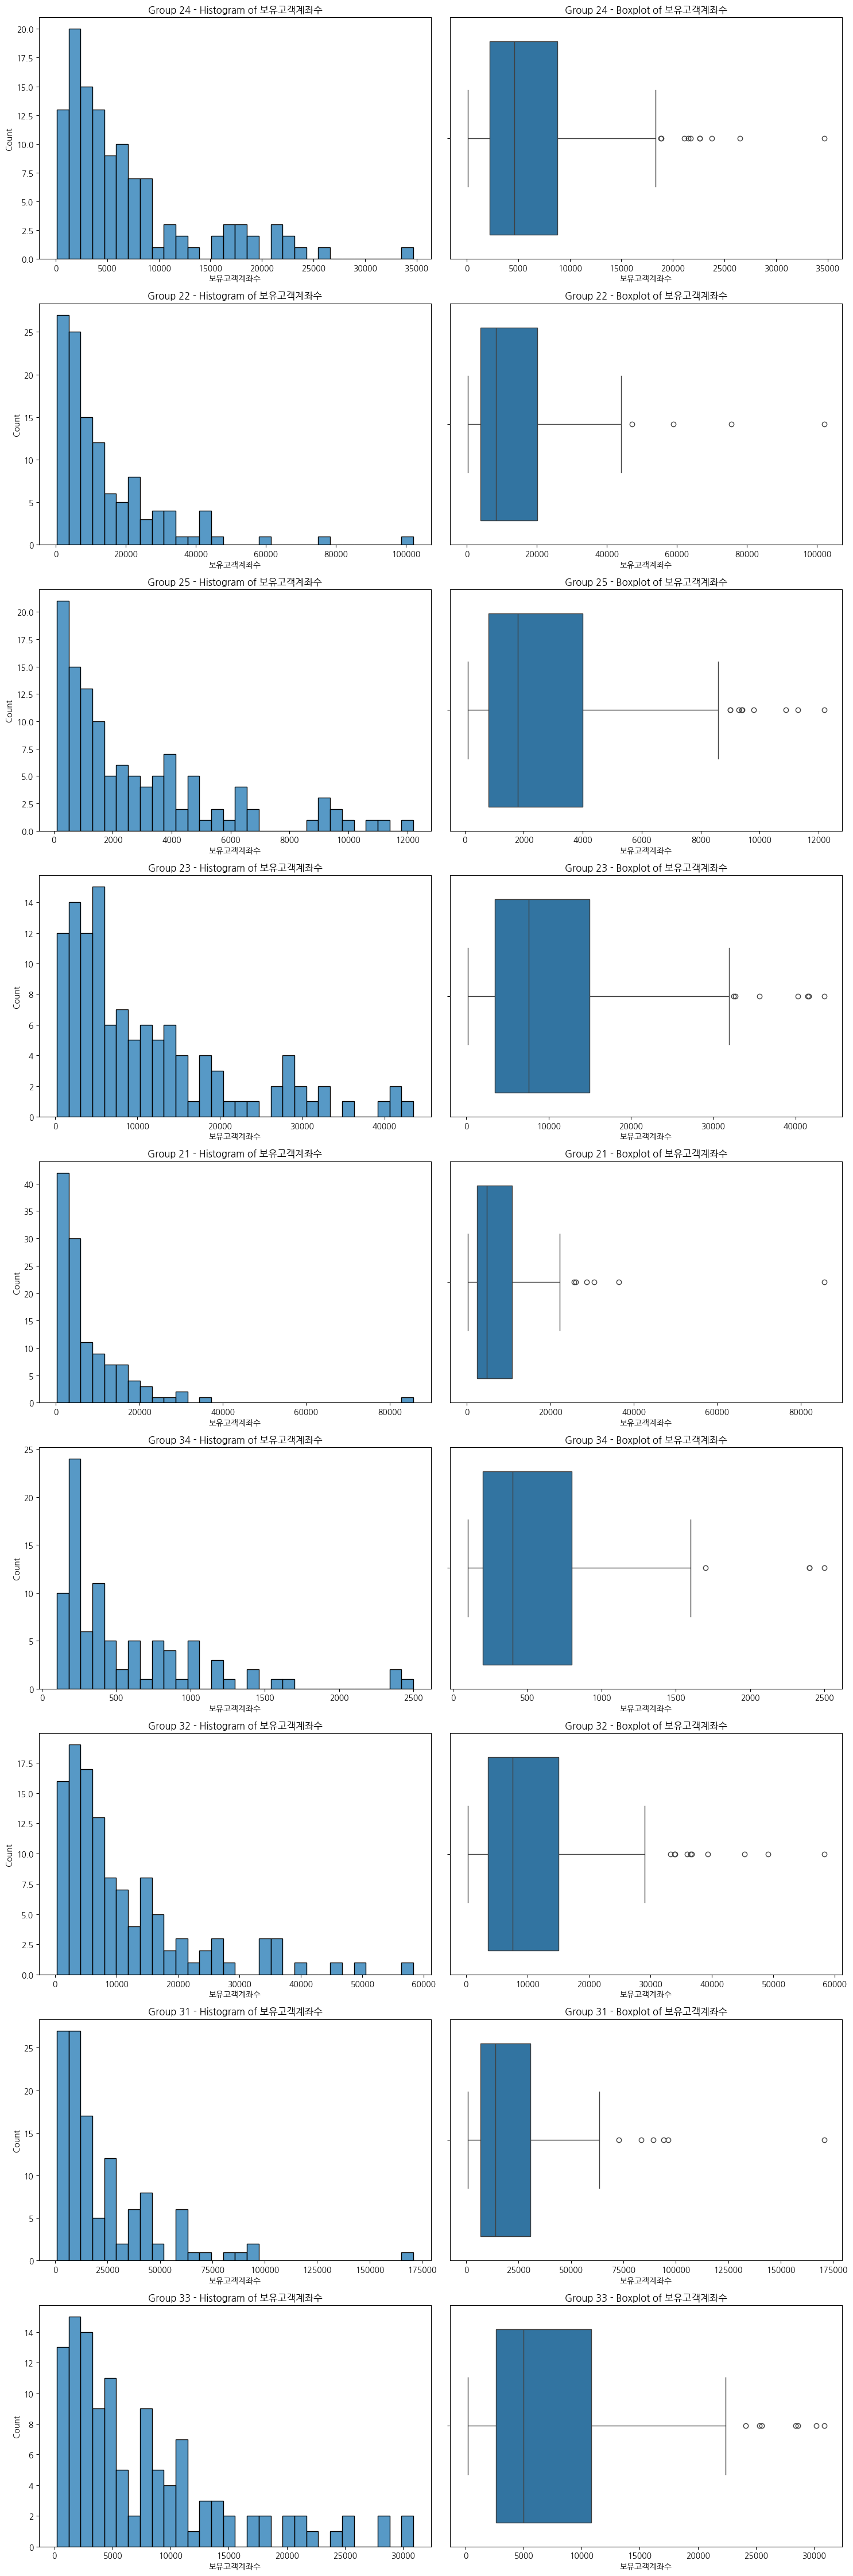

In [71]:
# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
# 히스토그램과 박스플롯을 그리기 위한 설정
fig, axes = plt.subplots(len(dict_0726), 2, figsize=(15, 5 * len(dict_0726)))

for i, (group_name, df) in enumerate(dict_0726.items()):
    # 히스토그램
    sns.histplot(df['보유고객계좌수'], bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Group {group_name} - Histogram of 보유고객계좌수')
    
    # 박스플롯
    sns.boxplot(x=df['보유고객계좌수'], ax=axes[i, 1])
    axes[i, 1].set_title(f'Group {group_name} - Boxplot of 보유고객계좌수')

plt.tight_layout()
plt.show()